In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import datetime
import seaborn as sns
import plotly
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
from scipy import stats

In [2]:
df_data_science_salaries_plot = pd.read_csv("Data Science Salaries(plotting).csv")

df_data_science_salaries_plot['Time'] = pd.to_datetime(df_data_science_salaries_plot['Time'])

df_data_science_salaries_plot.head()

,Unnamed: 0.1,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,State,Country,Time
0,0,0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,1.5,1.5,NaN,149800.0,20000.0,10000.0,CA,USA,2017-06-07 11:33:27
1,1,1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,5.0,3.0,NaN,0.0,0.0,0.0,CA,USA,2017-06-10 17:11:29
2,2,2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,8.0,0.0,NaN,217000.0,0.0,0.0,WA,USA,2017-06-11 14:53:57
3,3,3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,7.0,5.0,NaN,219800.0,180000.0,35000.0,CA,USA,2017-06-17 00:23:14
4,4,4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,5.0,3.0,NaN,0.0,0.0,0.0,CA,USA,2017-06-20 10:58:51


In [3]:
df_data_science_salaries_plot.dtypes

Unnamed: 0.1                        int64
Unnamed: 0                          int64
timestamp                          object
company                            object
level                              object
title                              object
totalyearlycompensation             int64
yearsofexperience                 float64
yearsatcompany                    float64
tag                                object
basesalary                        float64
stockgrantvalue                   float64
bonus                             float64
State                              object
Country                            object
Time                       datetime64[ns]
dtype: object

# Best Paying Company

In [4]:
# Checking number of values counts that have 0 basesalary

print(f"Number of data values in base salary that are 0: {df_data_science_salaries_plot['basesalary'].where(df_data_science_salaries_plot['basesalary'] == 0).count()}")

# Finding mean of basesalary without the data values that are zero
avg_basesalary = df_data_science_salaries_plot['basesalary'].where(df_data_science_salaries_plot['basesalary'] != 0).mean()

print(f"Mean of basesalary, excluding the zeros: SGD {avg_basesalary:.2f}")

#Replacing 0 data values with avg_basesalary

df_data_science_salaries_plot['basesalary'].replace(to_replace = 0, value = avg_basesalary, inplace= True)

#Double checking

df_data_science_salaries_plot.head()

Number of data values in base salary that are 0: 1909
Mean of basesalary, excluding the zeros: SGD 207954.73


,Unnamed: 0.1,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,State,Country,Time
0,0,0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,1.5,1.5,NaN,149800.000000,20000.0,10000.0,CA,USA,2017-06-07 11:33:27
1,1,1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,5.0,3.0,NaN,207954.733206,0.0,0.0,CA,USA,2017-06-10 17:11:29
2,2,2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,8.0,0.0,NaN,217000.000000,0.0,0.0,WA,USA,2017-06-11 14:53:57
3,3,3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,7.0,5.0,NaN,219800.000000,180000.0,35000.0,CA,USA,2017-06-17 00:23:14
4,4,4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,5.0,3.0,NaN,207954.733206,0.0,0.0,CA,USA,2017-06-20 10:58:51


In [5]:
#Checking highest paying average basesalary based on company and saving into new variable

df_best_paying_company = df_data_science_salaries_plot.groupby(['company']).mean().sort_values(by = 'basesalary', ascending = False)

df_best_paying_company.reset_index(inplace=True)

df_best_paying_company

,company,Unnamed: 0.1,Unnamed: 0,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
0,Netflix,29538.805970,29538.805970,481376.865672,9.772388,2.583209,632453.267654,11045.708955,1291.044776
1,Box,28632.936364,28632.936364,302809.090909,9.345455,2.218182,280454.306055,88784.090909,7027.272727
2,Cruise,29359.500000,29359.500000,343219.827586,6.327586,1.146552,270889.818386,91344.827586,57025.862069
3,DoorDash,36870.094488,36870.094488,314692.913386,5.921260,0.568504,258741.375852,122692.913386,7314.960630
4,Airbnb,22162.964758,22162.964758,361832.599119,6.435242,1.470485,255237.936263,151863.436123,28986.233480
...,...,...,...,...,...,...,...,...,...
74,Northrop Grumman,35074.504673,35074.504673,108383.177570,4.878505,3.205607,149761.770714,495.327103,2074.766355
75,EPAM,33467.881818,33467.881818,112518.181818,9.800000,4.195455,147001.990298,2181.818182,6672.727273
76,Shopify,41943.090129,41943.090129,147931.330472,6.053648,1.547210,146237.379684,41845.493562,2201.716738
77,General Motors,35564.902985,35564.902985,102238.805970,4.723881,2.242537,129784.996018,350.746269,10436.567164


In [6]:
date_range = str(df_data_science_salaries_plot['Time'].dt.date.min()) + ' to ' + str(df_data_science_salaries_plot['Time'].dt.date.max())

date_range

'2017-06-07 to 2021-08-17'

In [48]:
df_data_science_salaries_plot['Country'].unique()

array(['USA', 'United Kingdom', 'Ireland', 'India', 'Russia', 'Canada',
       'Netherlands', 'Switzerland', 'Singapore', 'Germany', 'Australia',
       'Israel'], dtype=object)

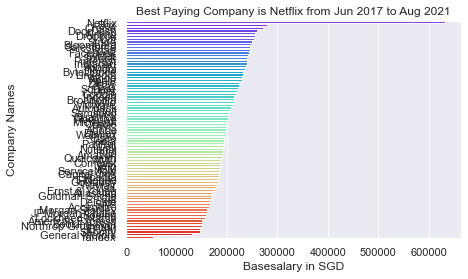

In [7]:
# Using Seaborn
sns.set(rc={'figure.figsize': (5, 20)})

best_paying_company = sns.barplot(x = 'basesalary', y = 'company', data = df_best_paying_company, 
                                ci = None, palette = 'rainbow', 
                                order = df_best_paying_company.sort_values('basesalary', ascending = False).company)

best_paying_company.set(xlabel = 'Basesalary in SGD', ylabel = 'Company Names', title = 'Best Paying Company is Netflix from Jun 2017 to Aug 2021')

plt.show()

# Deeper dive into Netflix

In [8]:
df_Netflix = df_data_science_salaries_plot[df_data_science_salaries_plot['company'] == 'Netflix']

df_Netflix['basesalary'].describe()

count    2.680000e+02
mean     6.324533e+05
std      2.102881e+05
min      1.680000e+05
25%      5.390000e+05
50%      6.300000e+05
75%      7.700000e+05
max      1.250200e+06
Name: basesalary, dtype: float64

In [9]:
df_Netflix.loc[df_Netflix['basesalary'] > 1250000]

,Unnamed: 0.1,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,State,Country,Time
41222,56175,56175,6/30/2021 15:26:10,Netflix,Senior Software Engineer,Software Engineer,893000,19.0,8.0,Platform,1250200.0,0.0,0.0,CA,USA,2021-06-30 15:26:10


Text(0.5, 1.0, 'Fig 1')

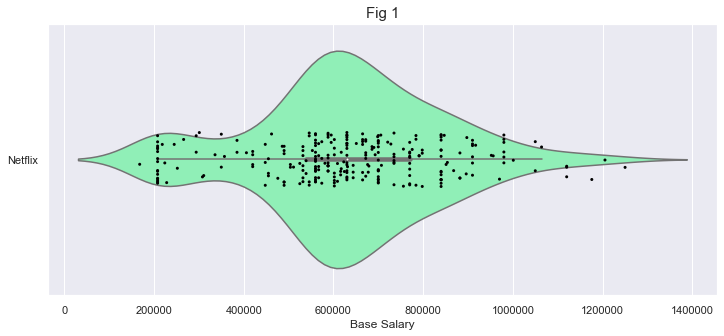

In [38]:
sns.set(rc={'figure.figsize':(12, 5)})

sns.violinplot(y="company", x="basesalary", data=df_Netflix, palette='rainbow')

sns.stripplot(y="company", x="basesalary", data=df_Netflix, color='black', size=3).set(ylabel = None, xlabel = 'Base Salary')

plt.ticklabel_format(style='plain', axis = 'x')
plt.title('Fig 1', fontsize = 15)

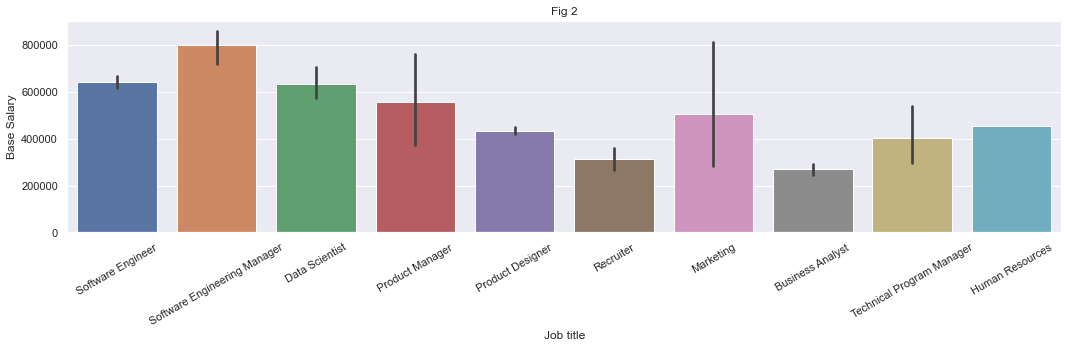

In [11]:
sns.set(rc={'figure.figsize':(15, 5)})

sns.barplot(x='title',y='basesalary',data=df_Netflix, estimator = np.mean).set(title='Fig 2', xlabel = 'Job title', ylabel = 'Base Salary')

plt.xticks(rotation = 30)
plt.tight_layout()

# Best Paying Job Title

In [12]:
# Checking number of values counts that have no job title

print(f"Number of entries with no job title: {df_data_science_salaries_plot['title'].isna().sum()}")

Number of entries with no job title: 0


In [13]:
# Checking highest paying average basesalary based on title

df_best_paying_title = df_data_science_salaries_plot.groupby(['title']).mean().sort_values(by = 'basesalary', ascending = False)

df_best_paying_title.reset_index(inplace = True)

df_best_paying_title

,title,Unnamed: 0.1,Unnamed: 0,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
0,Software Engineering Manager,27921.907224,27921.907224,388356.802347,14.309131,5.150330,265864.794491,135650.908324,37418.292263
1,Product Manager,29498.871978,29498.871978,276532.967033,9.515247,3.285632,225608.746036,78448.905220,25762.994505
2,Technical Program Manager,38784.987773,38784.987773,248377.292576,12.384279,3.816856,224495.292110,61913.777293,24967.685590
3,Data Scientist,30321.608475,30321.608475,226219.209040,5.204520,2.048220,213311.666812,52236.723164,19324.858757
4,Solution Architect,30582.418549,30582.418549,228265.160523,12.746730,3.766468,213257.933960,44538.644471,27938.168847
5,Hardware Engineer,31948.692584,31948.692584,232219.497608,8.421053,4.054605,211042.550276,56853.169856,22516.746411
6,Product Designer,30354.611210,30354.611210,226720.640569,7.714413,2.344440,208346.804503,55357.206406,19867.615658
7,Marketing,39911.581028,39911.581028,214033.596838,9.584980,3.475296,207316.421870,41122.727273,22618.577075
8,Software Engineer,28175.555048,28175.555048,223955.657230,6.136585,2.361482,201732.975477,58275.790470,18895.415483
9,Management Consultant,39845.645215,39845.645215,160780.528053,7.727723,3.404703,191970.957096,7490.099010,16278.877888


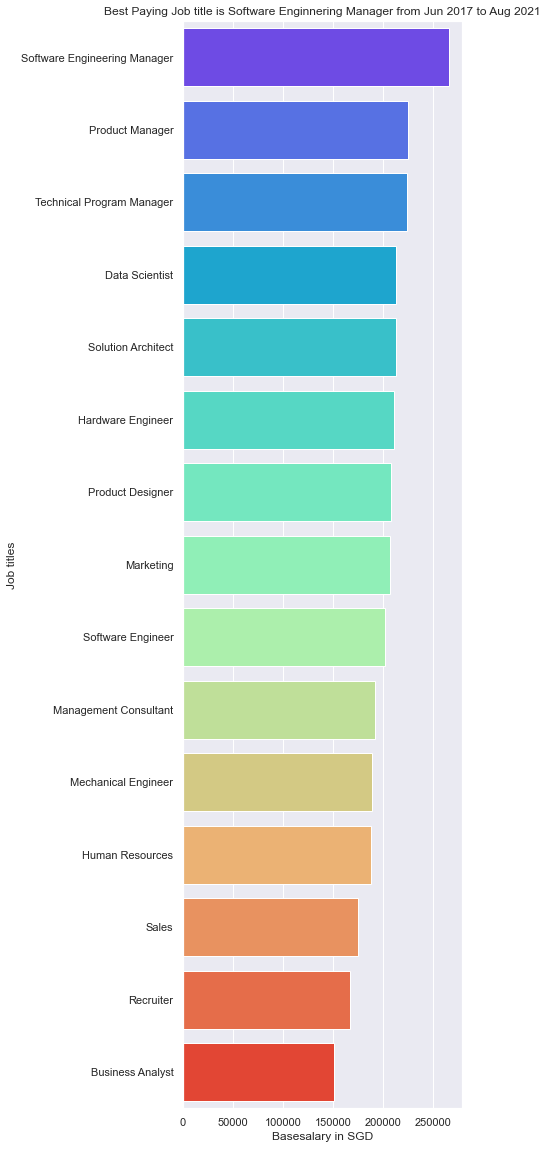

In [14]:
# Using Seaborn
sns.set(rc={'figure.figsize': (5, 20)})

best_paying_title = sns.barplot(x = 'basesalary', y = 'title', data = df_best_paying_title, 
                                ci = None, palette= 'rainbow', estimator=np.mean,
                                order = df_best_paying_title.sort_values('basesalary', ascending = False).title)


best_paying_title.set(xlabel = 'Basesalary in SGD', ylabel = 'Job titles', title = 'Best Paying Job title is Software Enginnering Manager from Jun 2017 to Aug 2021')

plt.show()

# Deeper dive into Software Engineering Manager

In [15]:
df_Software_Eng_Mgr = df_data_science_salaries_plot[df_data_science_salaries_plot['title'] == 'Software Engineering Manager']

df_Software_Eng_Mgr['basesalary'].describe()

count    2.727000e+03
mean     2.658648e+05
std      9.223404e+04
min      1.400000e+04
25%      2.170000e+05
50%      2.520000e+05
75%      3.080000e+05
max      1.190000e+06
Name: basesalary, dtype: float64

In [16]:
df_Software_Eng_Mgr.loc[df_Software_Eng_Mgr['basesalary'] > 1180000]

,Unnamed: 0.1,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,State,Country,Time
44750,61967,61967,8/20/2019 15:35:10,Microsoft,80,Software Engineering Manager,4950000,24.0,8.0,ML / AI,1190000.0,3750.0,350000.0,WA,USA,2019-08-20 15:35:10


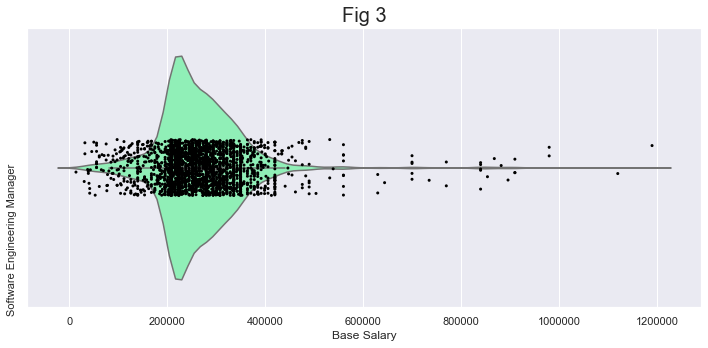

In [39]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.violinplot(y="title", x="basesalary", data=df_Software_Eng_Mgr, palette='rainbow')

sns.stripplot(y="title", x="basesalary", data=df_Software_Eng_Mgr, color='black', size=3).set(ylabel = None, xlabel = 'Base Salary')

plt.yticks(rotation = 90)
plt.title('Fig 3', fontsize = 20)
plt.ticklabel_format(style='plain', axis = 'x')
plt.tight_layout()

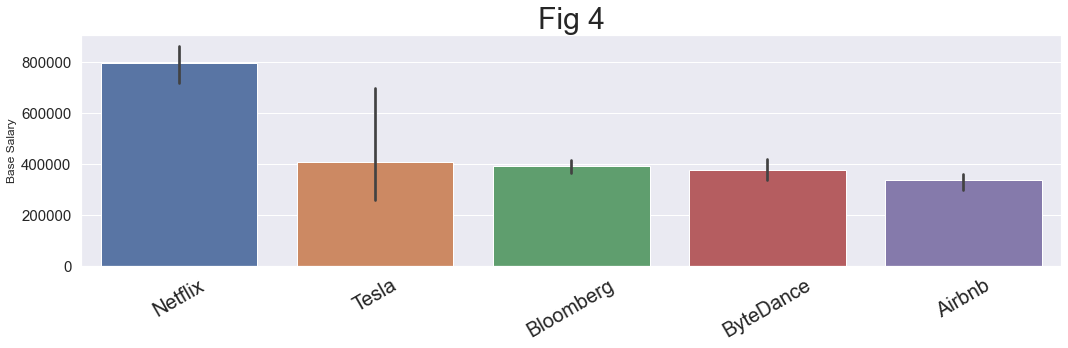

In [35]:
sns.set(rc={'figure.figsize':(15, 5)})

sorting = df_Software_Eng_Mgr.groupby(['company'])['basesalary'].aggregate(np.mean).reset_index().sort_values('basesalary', ascending = False).head(5)

sns.barplot(x='company',y='basesalary',data=df_Software_Eng_Mgr, estimator = np.mean, order = sorting['company']).set(xlabel = None, ylabel = 'Base Salary')

plt.xticks(rotation = 30, fontsize = 20)
plt.yticks(fontsize = 15)
plt.title('Fig 4', fontsize = 30)
plt.tight_layout()

# Scatterplot and Linear Regression for Basesalary vs Years of Experience

In [71]:
#Spotting outlier: one with too much experience

df_data_science_salaries_plot.loc[df_data_science_salaries_plot['yearsofexperience'] >60]

,Unnamed: 0.1,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,State,Country,Time
35158,46988,46988,4/3/2021 11:04:46,Disney,5,Product Designer,102000,69.0,69.0,Interaction Design,140000.0,2000.0,0.0,MD,USA,2021-04-03 11:04:46


In [72]:
#Removing outlier: one with too much experience

df_data_science_salaries_plot.drop(df_data_science_salaries_plot[df_data_science_salaries_plot.yearsofexperience > 60].index, inplace = True)

df_data_science_salaries_plot.loc[df_data_science_salaries_plot['yearsofexperience'] >60]

,Unnamed: 0.1,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,State,Country,Time


In [73]:
#Spotting outlier: one with too high basesalary

df_data_science_salaries_plot.loc[df_data_science_salaries_plot['basesalary'] > 1500000]

,Unnamed: 0.1,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,State,Country,Time
45072,62351,62351,1/5/2018 13:59:58,Microsoft,64,Product Manager,250000,13.0,13.0,NaN,2323818.0,49850.0,31500.0,WA,USA,2018-01-05 13:59:58


In [74]:
#Removign outlier: one with too high basesalary

df_data_science_salaries_plot.drop(df_data_science_salaries_plot[df_data_science_salaries_plot.basesalary > 2000000 ].index, inplace = True)

df_data_science_salaries_plot.loc[df_data_science_salaries_plot['basesalary'] > 1500000]

,Unnamed: 0.1,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,State,Country,Time


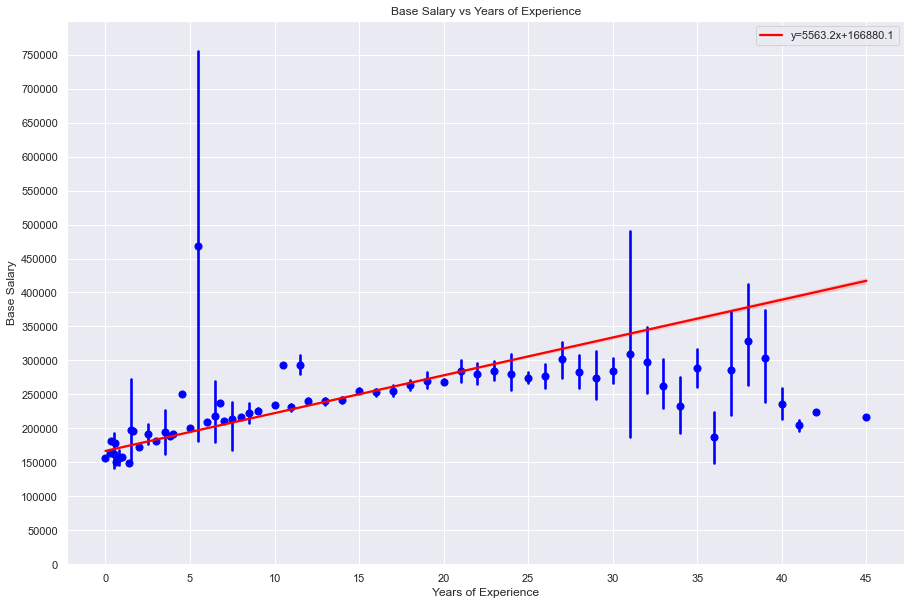

In [75]:
sns.set(rc={'figure.figsize': (15, 10)})

slope, intercept, r_value, p_value, std_err = stats.linregress(df_data_science_salaries_plot['yearsofexperience'],df_data_science_salaries_plot['basesalary'])

basesalary_vs_exp = sns.regplot(x='yearsofexperience', y='basesalary', data=df_data_science_salaries_plot, x_estimator= np.mean,
                                scatter_kws = {'color':'blue'}, 
                                line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), 'color':'red'})

basesalary_vs_exp.set(xlabel = 'Years of Experience', ylabel = 'Base Salary', title = 'Base Salary vs Years of Experience')

basesalary_vs_exp.legend()

plt.ylim(0, 800000)

plt.xticks(np.arange(0, 50, 5))

plt.yticks(np.arange(0, 800000, 50000))

plt.show()

# Location and Base Salary

In [76]:
# Checking number of values counts that have no location

print(f"Number of entries with no location: {df_data_science_salaries_plot['Country'].isna().sum()}")

Number of entries with no location: 0


In [77]:
# Checking highest paying average basesalary based on location

df_best_paying_location = df_data_science_salaries_plot.groupby(['Country']).mean().sort_values(by = 'basesalary', ascending = False)

df_best_paying_location.reset_index(inplace = True)

df_best_paying_location

,Country,Unnamed: 0.1,Unnamed: 0,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
0,Switzerland,24557.206667,24557.206667,272000.000000,7.966667,3.490000,239879.648880,62406.666667,27826.666667
1,USA,28636.787893,28636.787893,251902.502039,7.405239,2.817409,220220.625396,66720.795048,22627.887207
2,Israel,33622.081545,33622.081545,180673.819742,8.699571,3.419528,178559.900423,34291.845494,18227.467811
3,Australia,33348.618280,33348.618280,166338.709677,8.666667,2.505376,165440.922213,28494.623656,17456.989247
4,Singapore,36676.995000,36676.995000,170295.000000,7.675000,2.505000,163874.760000,34298.750000,19209.340000
5,United Kingdom,34833.774275,34833.774275,174954.602774,7.225725,2.108449,155792.496087,43332.282472,18842.370744
6,Canada,36357.436145,36357.436145,148121.285141,6.431727,2.113253,146727.781736,32814.056225,10766.265060
7,Netherlands,28380.074074,28380.074074,144111.111111,8.682540,2.595238,145584.087825,23132.275132,16560.846561
8,Ireland,33917.242291,33917.242291,152713.656388,7.647577,2.319824,139745.258441,41403.083700,13339.207048
9,Germany,34036.764925,34036.764925,129824.626866,7.410448,2.315299,134529.414673,22186.567164,12018.656716


In [78]:
df_data_science_salaries_plot['Year'] = df_data_science_salaries_plot['Time'].dt.year

In [79]:
basesalary_country = pd.pivot_table(df_data_science_salaries_plot, values = 'basesalary', index= 'Country', columns= 'Year', aggfunc= np.mean)

basesalary_country.reset_index(inplace = False)

basesalary_country

Year,2017,2018,2019,2020,2021
Country,,,,,
Australia,NaN,206231.276118,166173.086628,165081.690141,161825.641026
Canada,168000.000000,158566.284295,161988.966219,140738.242280,146180.922099
Germany,NaN,142988.683301,141811.728544,129234.848485,138963.461538
India,158577.366603,124389.419386,88227.313059,62575.280899,61892.497626
Ireland,138600.000000,175259.937225,135559.797431,128644.444444,143770.297030
Israel,NaN,190252.366603,182449.581574,173840.000000,181738.461538
Netherlands,NaN,134644.279975,145798.064844,143657.500000,151028.070175
Russia,NaN,73256.209981,58423.113884,48480.412371,55091.228070
Singapore,NaN,153070.400000,181490.909091,168422.916667,157325.000000


In [80]:
basesalary_country_transposed = basesalary_country.transpose(copy = True)

basesalary_country_transposed.reset_index(inplace = True)

basesalary_country_transposed

Country,Year,Australia,Canada,Germany,India,Ireland,Israel,Netherlands,Russia,Singapore,Switzerland,USA,United Kingdom
0,2017,NaN,168000.000000,NaN,158577.366603,138600.000000,NaN,NaN,NaN,NaN,NaN,213791.733706,196377.366603
1,2018,206231.276118,158566.284295,142988.683301,124389.419386,175259.937225,190252.366603,134644.279975,73256.209981,153070.400000,214631.138836,216183.881737,187892.592816
2,2019,166173.086628,161988.966219,141811.728544,88227.313059,135559.797431,182449.581574,145798.064844,58423.113884,181490.909091,237682.284537,218292.335858,146984.396513
3,2020,165081.690141,140738.242280,129234.848485,62575.280899,128644.444444,173840.000000,143657.500000,48480.412371,168422.916667,240240.000000,220039.939056,150279.322034
4,2021,161825.641026,146180.922099,138963.461538,61892.497626,143770.297030,181738.461538,151028.070175,55091.228070,157325.000000,249918.918919,222929.345281,159803.225806


In [81]:
basesalary_country_transposed.dtypes

Country
Year                int64
Australia         float64
Canada            float64
Germany           float64
India             float64
Ireland           float64
Israel            float64
Netherlands       float64
Russia            float64
Singapore         float64
Switzerland       float64
USA               float64
United Kingdom    float64
dtype: object

In [89]:
fig_basesalary_country = go.Figure()

for i in range(2, 13):
    fig_basesalary_country.add_trace(go.Scatter(
    
    x = basesalary_country_transposed['Year'],
    y = basesalary_country_transposed.iloc[:,i],
    
    name = basesalary_country_transposed.columns[i-1],
))

fig_basesalary_country.update_layout(xaxis = dict(
                                    tickmode = 'linear'),
                                    autosize = False,
                                    width = 800,
                                    height = 400,
                                    title = 'Avg Basesalary by Country from 2017 - 2021'
)

fig_basesalary_country.show()

# Top 5 Companies in terms of base salary, Yearly compensation, Years at company

In [116]:
#Top 5 companies

# df_best_paying_company.head(5)

,company,Unnamed: 0.1,Unnamed: 0,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
0,Netflix,29538.805970,29538.805970,481376.865672,9.772388,2.583209,632453.267654,11045.708955,1291.044776
1,Box,28632.936364,28632.936364,302809.090909,9.345455,2.218182,280454.306055,88784.090909,7027.272727
2,Cruise,29359.500000,29359.500000,343219.827586,6.327586,1.146552,270889.818386,91344.827586,57025.862069
3,DoorDash,36870.094488,36870.094488,314692.913386,5.921260,0.568504,258741.375852,122692.913386,7314.960630
4,Airbnb,22162.964758,22162.964758,361832.599119,6.435242,1.470485,255237.936263,151863.436123,28986.233480


In [121]:
# yearlycompensation_yearsatcompany = df_best_paying_company.head(5).filter(items = ['company','totalyearlycompensation', 'yearsatcompany']).sort_values(by='totalyearlycompensation', ascending = False)

# yearlycompensation_yearsatcompany

,company,totalyearlycompensation,yearsatcompany
0,Netflix,481376.865672,2.583209
4,Airbnb,361832.599119,1.470485
2,Cruise,343219.827586,1.146552
3,DoorDash,314692.913386,0.568504
1,Box,302809.090909,2.218182


In [ ]:
# import plotly.express as px

# yearlycompensation_3d = px.scatter_3d(yearlycompensation_yearsatcompany, x='yearsatcompany', y='totalyearlycompensation', z='company',
#               color='company')

# yearlycompensation_3d.update_layout(margin = dict(l = 0, r =0, b = 0, t = 0))

# yearlycompensation_3d.show()

# Avg employees salary vs Country (with dropdown Company function)

In [166]:
SG_vs_overseas = pd.pivot_table(df_data_science_salaries_plot, values = 'basesalary', index= 'Country', columns= 'company', aggfunc= np.mean)

SG_vs_overseas.reset_index(inplace=True)

SG_vs_overseas_11 = SG_vs_overseas.dropna(axis = 1, thresh=11)

SG_vs_overseas_11

company,Country,Amazon,Google,IBM,Microsoft,SAP
0,Australia,181502.606343,162526.498540,171500.000000,156162.894434,206500.000000
1,Canada,157830.239324,156226.498540,133587.357382,142803.091003,135162.673860
2,Germany,131994.569466,156846.666667,122000.000000,150400.000000,109202.958552
3,India,71750.034734,64525.839297,58450.000000,61617.097516,50824.242424
4,Ireland,139211.979892,151289.780550,101400.000000,145205.157774,65100.000000
5,Israel,174600.000000,205357.894737,192362.688846,183184.615385,147700.000000
6,Netherlands,144316.666667,100100.000000,NaN,175000.000000,NaN
7,Russia,NaN,NaN,49000.000000,82600.000000,91700.000000
8,Singapore,215133.333333,181611.111111,56000.000000,214550.000000,196000.000000
9,Switzerland,210000.000000,245160.671256,248733.333333,214550.000000,126000.000000


In [170]:
#Template code for creating a boxplot with dropdown option in output

fig_SG_vs_overseas = go.Figure()

fig_SG_vs_overseas.add_trace(go.Bar(x = SG_vs_overseas_11['Country'], y = SG_vs_overseas_11[SG_vs_overseas_11.columns[1]]))

updatemenu = []
buttons = []

for col in SG_vs_overseas_11.columns:
    buttons.append(dict(method='restyle',
                        label=col,
                        visible=True,
                        args=[{'y':[SG_vs_overseas_11[col]],
                               'x':[SG_vs_overseas_11['Country']],
                               'type':'bar'}, [0]],
                        )
                  )

# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig_SG_vs_overseas.update_layout(showlegend=False, updatemenus=updatemenu, title = 'Avg Basesalary by Country by Company', barmode = 'stack', xaxis = {'categoryorder': 'total descending'})

fig_SG_vs_overseas.show()

In [83]:
#Our objective:

#Caveat that standard of living between countries are different
#Having domain knowledge of your industry is good as well
#Can compare companies that give stock grants vs companies that don't or differing between levels in terms of stock grant value
#Focus on companies that provide more than a certain numebr of entries because we want to focus on bigger companies with stronger G-power analysis